# Lectura de Datos

In [221]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_classif, f_regression

In [222]:
pd.set_option("display.max_columns", 100)
pd.set_option('display.float_format', lambda x: "{:,.2f}".format(x))

In [223]:
train_PAY_AMT1 = pd.read_csv('/Users/gblasd/Documents/DataScience/02_SupervisedLearning/data/Examen_1/train_PAY_AMT1.csv',
                             delimiter='|')
train_PAY_AMT1.shape

(5625, 23)

In [224]:
val_PAY_AMT1 = pd.read_csv('/Users/gblasd/Documents/DataScience/02_SupervisedLearning/data/Examen_1/val_PAY_AMT1.csv',
                             delimiter='|')
val_PAY_AMT1.shape

(1875, 22)

In [225]:
val_PAY_AMT1.head()

,CUSTOMER_ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,4130,"30,000.00",2,2,2,22,2,2,2,-1,-1,200.00,200.00,200.00,200.00,"29,847.00","30,089.00",0.00,0.00,"29,847.00",340.00,0.00
1,4150,"180,000.00",2,1,2,28,-2,-2,-2,-2,-2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,19181,"250,000.00",2,2,2,24,0,0,0,0,0,"69,770.00","70,954.00","70,681.00","69,497.00","41,367.00","17,004.00","1,914.00","1,517.00","2,000.00","8,001.00",295.00
3,2595,"20,000.00",2,2,2,34,-1,-1,-1,-1,-1,780.00,0.00,390.00,390.00,390.00,"12,190.00",390.00,390.00,390.00,"12,190.00",780.00
4,4513,"40,000.00",2,2,1,36,2,2,2,0,0,"7,129.00","8,850.00","9,733.00","9,375.00","6,003.00","2,435.00","1,172.00",0.00,500.00,"1,015.00","1,000.00"


In [226]:
train_PAY_AMT1.head()

,CUSTOMER_ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,22944,"90,000.00",2,3,1,42,0,0,0,0,0,"34,672.00","35,270.00","36,150.00","36,528.00","37,128.00","37,348.00","1,562.00","1,832.00","1,600.00","1,000.00","1,000.00",0.00
1,28806,"40,000.00",2,2,1,33,2,2,2,2,2,"23,734.00","24,644.00","25,749.00","26,127.00","26,401.00","25,839.00","1,600.00","1,800.00","1,100.00","1,000.00",0.00,"2,300.00"
2,26865,"40,000.00",2,1,2,26,0,0,0,-1,-1,"6,223.00","7,944.00","8,961.00","3,090.00",390.00,795.00,"2,000.00","1,196.00","1,000.00","1,950.00",795.00,"1,170.00"
3,3082,"90,000.00",2,3,2,50,0,0,0,0,0,"83,939.00","86,583.00","87,014.00","46,293.00","47,576.00","46,663.00","4,000.00","2,500.00","2,000.00","2,000.00","2,000.00","2,000.00"
4,10159,"30,000.00",2,2,2,22,0,0,0,0,0,"30,123.00","30,299.00","27,758.00","22,720.00","19,136.00","14,452.00","1,600.00","2,000.00","2,000.00",614.00,924.00,0.00


In [227]:
train_PAY_AMT1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5625 entries, 0 to 5624
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CUSTOMER_ID  5625 non-null   int64  
 1   LIMIT_BAL    5625 non-null   float64
 2   SEX          5625 non-null   int64  
 3   EDUCATION    5625 non-null   int64  
 4   MARRIAGE     5625 non-null   int64  
 5   AGE          5625 non-null   int64  
 6   PAY_2        5625 non-null   int64  
 7   PAY_3        5625 non-null   int64  
 8   PAY_4        5625 non-null   int64  
 9   PAY_5        5625 non-null   int64  
 10  PAY_6        5625 non-null   int64  
 11  BILL_AMT1    5625 non-null   float64
 12  BILL_AMT2    5625 non-null   float64
 13  BILL_AMT3    5625 non-null   float64
 14  BILL_AMT4    5625 non-null   float64
 15  BILL_AMT5    5625 non-null   float64
 16  BILL_AMT6    5625 non-null   float64
 17  PAY_AMT1     5625 non-null   float64
 18  PAY_AMT2     5625 non-null   float64
 19  PAY_AM

__Diccionario de datos__

* CUSTOMER ID: Identificador de cada cliente
* LIMIT BAL: Monto de la línea de crédito
* SEX: Genero (1=masculino, 2=femenino)
* EDUCATION: (1=preparatoria, 2=universidad, 3=secundaria, 4=otros, 5=desconocido, 6=desconocido, 0=nulo)
* MARRIAGE: Estatus marital (1=casado, 2=soltero, 3=otros, 0=nulo)
* AGE: Edad en años.
* PAY 0: Estatus de pago en Septiembre, 2005 (
    -2=no uso (non use),
    0=uso, 
    -1=pago correcto, 
    1=pago retrasado por un mes, 
    2=pago retrasado por dos meses , 
    ... 8=pago retrasado por ocho meses, 
    \* pago retrasado por nueve o mas meses).
* PAY 2: Estatus de pago en Agosto, 2005 (La escala es igual que en PAY 0).
* PAY 3: Estatus de pago en Julio, 2005 (La escala es igual que en PAY 0).
* PAY 4: Estatus de pago en Junio, 2005 (La escala es igual que en PAY 0).
* PAY 5: Estatus de pago en Mayo, 2005 (La escala es igual que en PAY 0).
* PAY 6: Estatus de pago en Abril, 2005 (La escala es igual que en PAY 0).
* BILL AMT1: Monto por pagar en Septiembre, 2005
* BILL AMT2: Monto por pagar en Agosto, 2005
* BILL AMT3: Monto por pagar en Julio, 2005
* BILL AMT4: Monto por pagar en Junio, 2005
* BILL AMT5: Monto por pagar en Mayo, 2005
* BILL AMT6: Monto por pagar en Abril, 2005
* PAY AMT1: Cantidad pagada en Septiembre, 2005
* PAY AMT2: Cantidad pagada en Agosto, 2005
* PAY AMT3: Cantidad pagada en Julio, 2005
* PAY AMT4: Cantidad pagada en Junio, 2005
* PAY AMT5: Cantidad pagada en Mayo, 2005
* PAY AMT6: Cantidad pagada en Abril, 2005
* default.payment.next.month: Incumplimiento de pago (1=si, 0=no)


__Objetivo (REGRESIÓN)__

PAY AMT1: Cantidad pagada en Septiembre, 2005. Para esta solución deben usarse los conjuntos train_PAY_AMT1.csv y val PAY_AMT1.csv.

# Análisis Exploratorio de Datos

Revisamos valores ausentes

In [228]:
train_PAY_AMT1.isna().sum() / train_PAY_AMT1.shape[0]

CUSTOMER_ID   0.00
LIMIT_BAL     0.00
SEX           0.00
EDUCATION     0.00
MARRIAGE      0.00
AGE           0.00
PAY_2         0.00
PAY_3         0.00
PAY_4         0.00
PAY_5         0.00
PAY_6         0.00
BILL_AMT1     0.00
BILL_AMT2     0.00
BILL_AMT3     0.00
BILL_AMT4     0.00
BILL_AMT5     0.00
BILL_AMT6     0.00
PAY_AMT1      0.00
PAY_AMT2      0.00
PAY_AMT3      0.00
PAY_AMT4      0.00
PAY_AMT5      0.00
PAY_AMT6      0.00
dtype: float64

In [229]:
train_PAY_AMT1.describe()

,CUSTOMER_ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,"5,625.00","5,625.00","5,625.00","5,625.00","5,625.00","5,625.00","5,625.00","5,625.00","5,625.00","5,625.00","5,625.00","5,625.00","5,625.00","5,625.00","5,625.00","5,625.00","5,625.00","5,625.00","5,625.00","5,625.00","5,625.00","5,625.00","5,625.00"
mean,"14,975.77","169,135.29",1.60,1.84,1.54,35.47,-0.11,-0.14,-0.21,-0.26,-0.26,"52,125.78","50,163.16","47,766.32","44,065.84","41,217.96","40,016.96","5,931.04","6,143.61","5,387.47","4,714.09","5,081.42","5,621.63"
std,"8,660.72","133,085.18",0.49,0.78,0.52,9.06,1.20,1.22,1.18,1.13,1.17,"77,205.54","73,993.57","72,896.20","66,259.44","62,996.38","62,464.98","16,738.34","28,468.70","19,684.13","13,916.82","16,534.31","19,638.48"
min,7.00,"10,000.00",1.00,0.00,0.00,21.00,-2.00,-2.00,-2.00,-2.00,-2.00,"-9,095.00","-30,000.00","-25,443.00","-65,167.00","-46,627.00","-46,627.00",0.00,0.00,0.00,0.00,0.00,0.00
25%,"7,464.00","50,000.00",1.00,1.00,1.00,28.00,-1.00,-1.00,-1.00,-1.00,-1.00,"3,609.00","3,462.00","2,936.00","2,500.00","1,980.00","1,390.00","1,000.00",762.00,428.00,303.00,287.00,200.00
50%,"15,090.00","140,000.00",2.00,2.00,2.00,34.00,0.00,0.00,0.00,0.00,0.00,"23,191.00","21,887.00","20,366.00","19,430.00","18,592.00","17,738.00","2,202.00","2,011.00","1,900.00","1,528.00","1,509.00","1,500.00"
75%,"22,456.00","240,000.00",2.00,2.00,2.00,41.00,0.00,0.00,0.00,0.00,0.00,"67,474.00","65,305.00","60,557.00","55,506.00","51,169.00","49,940.00","5,088.00","5,000.00","4,600.00","4,000.00","4,100.00","4,173.00"
max,"29,995.00","1,000,000.00",2.00,6.00,3.00,69.00,7.00,8.00,8.00,8.00,8.00,"964,511.00","983,931.00","1,664,089.00","891,586.00","927,171.00","961,664.00","405,016.00","1,684,259.00","896,040.00","400,046.00","388,071.00","527,143.00"


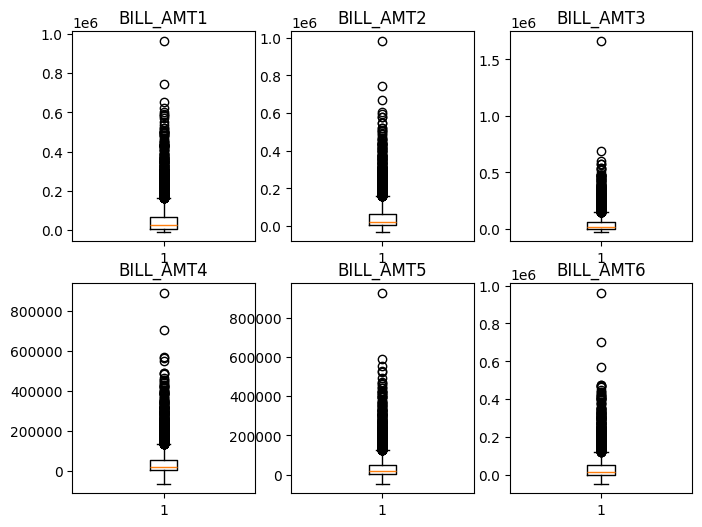

In [230]:
# numeric columns in DataFrame
col_df_num = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']

n_cols = 3
n_rows = 2

#fig = plt.figure(layout="constrained", figsize=(10, 10))
fig = plt.figure(figsize=(8, 6))
ax_array = fig.subplots(n_rows, n_cols, squeeze=False)

index_col = 0
for row in range(n_rows):
    for col in range(n_cols):
        ax_array[row, col].boxplot(train_PAY_AMT1[col_df_num[index_col]])
        ax_array[row, col].set_title(col_df_num[index_col])
        index_col += 1
        # to avoid error, break loop
        if index_col >= len(col_df_num):
            break

In [231]:
train_PAY_AMT1[['BILL_AMT1']].describe(percentiles=[0.01, .05, .25, .5, .75, .95, .96, .97, .98, .99]).T

,count,mean,std,min,1%,5%,25%,50%,75%,95%,96%,97%,98%,99%,max
BILL_AMT1,"5,625.00","52,125.78","77,205.54","-9,095.00",-19.76,0.00,"3,609.00","23,191.00","67,474.00","201,512.80","222,440.32","250,740.76","287,834.28","369,042.84","964,511.00"


In [232]:
train_PAY_AMT1.shape

(5625, 23)

In [233]:
train_PAY_AMT1[~(train_PAY_AMT1['BILL_AMT1'] < train_PAY_AMT1['BILL_AMT1'].quantile(.95))].shape

(282, 23)

In [234]:
train_PAY_AMT1[~(train_PAY_AMT1['BILL_AMT1'] > train_PAY_AMT1['BILL_AMT1'].quantile(.05))].shape

(467, 23)

In [235]:
train_PAY_AMT1 = train_PAY_AMT1[train_PAY_AMT1['BILL_AMT1'] < train_PAY_AMT1['BILL_AMT1'].quantile(.85)]
train_PAY_AMT1 = train_PAY_AMT1[train_PAY_AMT1['BILL_AMT1'] > train_PAY_AMT1['BILL_AMT1'].quantile(.05)]

In [236]:
train_PAY_AMT1.shape

(4314, 23)

In [237]:
train_PAY_AMT1[['BILL_AMT3']].describe(percentiles=[0.01, .05, .25, .5, .75, .99]).T

,count,mean,std,min,1%,5%,25%,50%,75%,99%,max
BILL_AMT3,"4,314.00","28,543.47","40,037.15","-24,702.00",-41.48,0.00,"3,745.00","18,469.00","45,557.00","115,004.03","1,664,089.00"


In [238]:
train_PAY_AMT1[~(train_PAY_AMT1['BILL_AMT3'] < train_PAY_AMT1['BILL_AMT3'].quantile(.99))].shape

(44, 23)

In [239]:
# train_PAY_AMT1 = train_PAY_AMT1[train_PAY_AMT1['BILL_AMT3'] < train_PAY_AMT1['BILL_AMT3'].quantile(.95)]
# train_PAY_AMT1 = train_PAY_AMT1[train_PAY_AMT1['BILL_AMT3'] > train_PAY_AMT1['BILL_AMT3'].quantile(.05)]

In [240]:
train_PAY_AMT1.shape

(4314, 23)

In [241]:
train_PAY_AMT1[['BILL_AMT2']].describe(percentiles=[0.01, .05, .25, .5, .75, .99]).T

,count,mean,std,min,1%,5%,25%,50%,75%,99%,max
BILL_AMT2,"4,314.00","28,849.41","29,873.90","-24,702.00",-26.74,0.00,"4,294.25","18,860.00","47,576.75","104,529.62","405,016.00"


In [242]:
train_PAY_AMT1[~(train_PAY_AMT1['BILL_AMT2'] < train_PAY_AMT1['BILL_AMT2'].quantile(.99))].shape

(44, 23)

In [243]:
train_PAY_AMT1[~(train_PAY_AMT1['BILL_AMT2'] > train_PAY_AMT1['BILL_AMT2'].quantile(.05))].shape

(251, 23)

In [244]:
# train_PAY_AMT1 = train_PAY_AMT1[train_PAY_AMT1['BILL_AMT2'] < train_PAY_AMT1['BILL_AMT2'].quantile(.95)]
# train_PAY_AMT1 = train_PAY_AMT1[train_PAY_AMT1['BILL_AMT2'] > train_PAY_AMT1['BILL_AMT2'].quantile(.05)]

In [245]:
train_PAY_AMT1.shape

(4314, 23)

<Axes: xlabel='EDUCATION'>

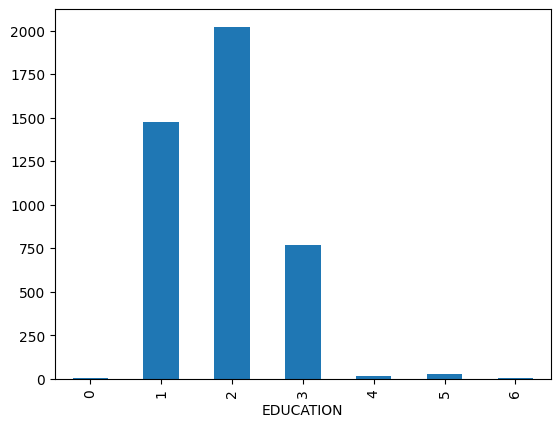

In [246]:
train_PAY_AMT1['EDUCATION'].value_counts().sort_index().plot(kind='bar')

In [247]:
train_PAY_AMT1['EDUCATION'].replace({4:0,5:0,6:0}, inplace=True)

/var/folders/hz/jqhxy08n571fxkqnm7ntk93c0000gn/T/ipykernel_68927/2736234471.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_PAY_AMT1['EDUCATION'].replace({4:0,5:0,6:0}, inplace=True)


<Axes: xlabel='EDUCATION'>

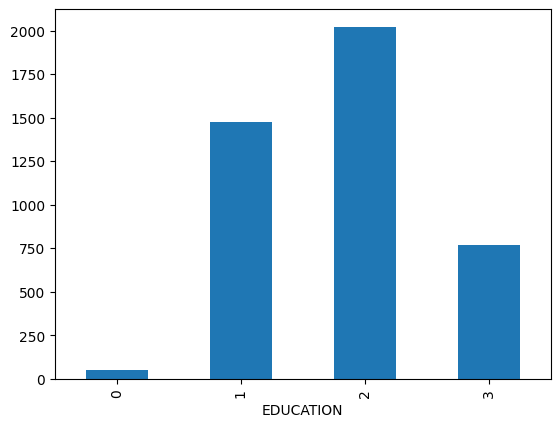

In [248]:
train_PAY_AMT1['EDUCATION'].value_counts().sort_index().plot(kind='bar')

In [249]:
# EDUCATION: (1=preparatoria, 2=universidad, 3=secundaria, 4=otros, 5=desconocido, 6=desconocido, 0=nulo)
train_PAY_AMT1['EDUCATION'].replace({3:2, 2:3}, inplace=True)

/var/folders/hz/jqhxy08n571fxkqnm7ntk93c0000gn/T/ipykernel_68927/379946103.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_PAY_AMT1['EDUCATION'].replace({3:2, 2:3}, inplace=True)


<Axes: xlabel='MARRIAGE'>

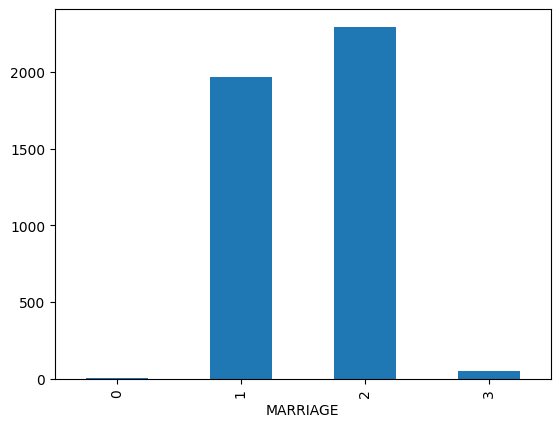

In [250]:
train_PAY_AMT1['MARRIAGE'].value_counts().sort_index().plot(kind='bar')

In [251]:
train_PAY_AMT1['MARRIAGE'].replace({0:2, 3:2}, inplace=True)

/var/folders/hz/jqhxy08n571fxkqnm7ntk93c0000gn/T/ipykernel_68927/912939589.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_PAY_AMT1['MARRIAGE'].replace({0:2, 3:2}, inplace=True)


<Axes: xlabel='MARRIAGE'>

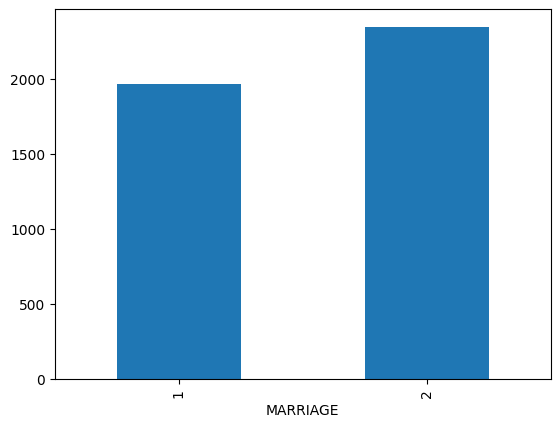

In [252]:
train_PAY_AMT1['MARRIAGE'].value_counts().sort_index().plot(kind='bar')

## Ingenieria de Variables

#### Numero de meses con retraso

In [253]:
# orden de los meses y total de meses de retraso en el pago
train_PAY_AMT1[ ['PAY_6', 'PAY_5', 'PAY_4', 'PAY_3', 'PAY_2'] ].sample(5)

,PAY_6,PAY_5,PAY_4,PAY_3,PAY_2
252,-1,-1,0,0,0
1591,0,0,0,0,0
2405,0,0,0,1,1
636,-1,-1,-1,0,0
2954,0,0,0,0,0


In [254]:
train_PAY_AMT1[ 'Num_Meses_Con_Retraso' ] = train_PAY_AMT1[['PAY_6', 'PAY_5', 'PAY_4', 'PAY_3', 'PAY_2']].apply(lambda row: (row > 0).sum(), axis=1)
train_PAY_AMT1[ 'Max_Meses_Con_Retraso' ] = train_PAY_AMT1[['PAY_6', 'PAY_5', 'PAY_4', 'PAY_3', 'PAY_2']].apply(lambda row: max(list(filter(lambda x: x > 0,row)), default=0), axis=1)
train_PAY_AMT1[ 'Max_Retraso_Reciente' ] = train_PAY_AMT1[['PAY_3', 'PAY_2']].apply(lambda row: max(list(filter(lambda x: x > 0,row)), default=0), axis=1)

In [255]:
lst_var_1 = ['Num_Meses_Con_Retraso', 'Max_Meses_Con_Retraso', 'Max_Retraso_Reciente']

# orden de los meses y total de meses de retraso en el pago
train_PAY_AMT1[ ['PAY_6', 'PAY_5', 'PAY_4', 'PAY_3', 'PAY_2'] + lst_var_1 ].sample(5)

,PAY_6,PAY_5,PAY_4,PAY_3,PAY_2,Num_Meses_Con_Retraso,Max_Meses_Con_Retraso,Max_Retraso_Reciente
4007,0,-1,2,0,0,1,2,0
1034,-1,-1,-1,2,-1,1,2,2
3174,-1,-2,-2,0,0,0,0,0
4262,-2,-2,-2,-2,-2,0,0,0
4548,-2,-1,-1,-1,2,1,2,2


#### Saldo de la deuda

In [256]:
train_PAY_AMT1[['BILL_AMT2','BILL_AMT3','BILL_AMT4']].sample(5)

,BILL_AMT2,BILL_AMT3,BILL_AMT4
2444,"58,876.00","73,068.00","102,311.00"
2915,"23,880.00","24,843.00","25,338.00"
2162,"15,105.00","16,545.00","16,977.00"
2363,390.00,"36,659.00","23,150.00"
5322,"36,108.00","37,112.00","37,695.00"


In [257]:
train_PAY_AMT1[ 'Promedio_Deuda_Ultimos_3_Meses' ] = train_PAY_AMT1[['BILL_AMT2','BILL_AMT3','BILL_AMT4']].apply(lambda row: row.mean(), axis=1)
train_PAY_AMT1[ 'Cambio_Deuda_Reciente' ] = train_PAY_AMT1[['BILL_AMT2','BILL_AMT3','BILL_AMT4']].apply(lambda row: row['BILL_AMT2'] - row['BILL_AMT3'], axis=1)
train_PAY_AMT1[ 'Suma_Deuda_Total_Historica' ] = train_PAY_AMT1[['BILL_AMT2','BILL_AMT3','BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].apply(lambda row: row.sum(), axis=1)
train_PAY_AMT1[ 'Max_Deuda_Historica' ] = train_PAY_AMT1[['BILL_AMT2','BILL_AMT3','BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].apply(lambda row: row.max(), axis=1)
train_PAY_AMT1[ 'Utilizacion_Credito_Actual' ] = train_PAY_AMT1.apply(lambda row: row['BILL_AMT1'] / row['LIMIT_BAL'], axis=1)
train_PAY_AMT1[ 'Utilizacion_Credito_Promedio' ] = train_PAY_AMT1.apply(lambda row: row[['BILL_AMT2','BILL_AMT3','BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].sum() / 6*row['LIMIT_BAL'], axis=1)


In [258]:
lst_var_2 = ['Promedio_Deuda_Ultimos_3_Meses', 'Cambio_Deuda_Reciente', 'Suma_Deuda_Total_Historica', 'Max_Deuda_Historica',
                'Utilizacion_Credito_Actual', 'Utilizacion_Credito_Promedio']
train_PAY_AMT1[['BILL_AMT2','BILL_AMT3','BILL_AMT4'] + lst_var_2].sample(5)

,BILL_AMT2,BILL_AMT3,BILL_AMT4,Promedio_Deuda_Ultimos_3_Meses,Cambio_Deuda_Reciente,Suma_Deuda_Total_Historica,Max_Deuda_Historica,Utilizacion_Credito_Actual,Utilizacion_Credito_Promedio
1723,"31,402.00","30,047.00","30,869.00","30,772.67","1,355.00","151,552.00","31,402.00",0.91,"757,760,000.00"
3366,"31,462.00","31,499.00","16,773.00","26,578.00",-37.00,"101,029.00","31,499.00",0.52,"1,010,290,000.00"
2019,"4,206.00","15,610.00","10,556.00","10,124.00","-11,404.00","47,854.00","15,610.00",0.01,"2,552,213,333.33"
3108,-5.00,-5.00,"1,578.00",522.67,0.00,"2,875.00","1,578.00",0.07,"143,750,000.00"
157,"19,760.00","18,570.00","17,604.00","18,644.67","1,190.00","77,424.00","19,760.00",0.92,"258,080,000.00"


#### Cantidad pagada 

In [259]:
train_PAY_AMT1[ 'Promedio_Pago_Ultimos_Meses' ] = train_PAY_AMT1[['BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4']].apply(lambda row: row.sum()/3, axis=1)
train_PAY_AMT1[ 'Suma_Pagos_Historicos' ] = train_PAY_AMT1[['BILL_AMT6', 'BILL_AMT5', 'BILL_AMT4', 'BILL_AMT3','BILL_AMT2']].apply(lambda row: row.sum(), axis=1)
train_PAY_AMT1[ 'Cambio_Pago_Reciente' ] = train_PAY_AMT1.apply(lambda row: row['PAY_AMT2'] - row['PAY_AMT3'], axis=1)
train_PAY_AMT1[ 'Ratio_Pago_Factura_Anterior' ] = np.where(train_PAY_AMT1['BILL_AMT2'] > 0, train_PAY_AMT1['PAY_AMT2'] / train_PAY_AMT1['BILL_AMT2'], 0)



In [260]:
lst_var_3 = ['Promedio_Pago_Ultimos_Meses', 'Suma_Pagos_Historicos', 'Cambio_Pago_Reciente', 'Ratio_Pago_Factura_Anterior']
train_PAY_AMT1[['BILL_AMT6', 'BILL_AMT5', 'BILL_AMT4', 'BILL_AMT3','BILL_AMT2'] + lst_var_3].sample(5)

,BILL_AMT6,BILL_AMT5,BILL_AMT4,BILL_AMT3,BILL_AMT2,Promedio_Pago_Ultimos_Meses,Suma_Pagos_Historicos,Cambio_Pago_Reciente,Ratio_Pago_Factura_Anterior
3451,"13,836.00","13,035.00","19,560.00","18,394.00","21,203.00","19,719.00","86,028.00",-166.00,0.06
3248,"70,047.00","68,680.00","69,145.00","71,488.00","81,826.00","74,153.00","361,186.00",698.00,0.04
1429,"7,300.00","16,098.00","27,497.00","17,036.00","26,269.00","23,600.67","94,200.00","-25,241.00",0.09
2043,"7,457.00","7,228.00","6,839.00","6,599.00","5,550.00","6,329.33","33,673.00",800.00,0.23
568,"29,826.00","29,391.00","29,291.00","49,222.00","49,160.00","42,557.67","186,890.00","1,013.00",0.04


#### Perfil del cliente

In [261]:
train_PAY_AMT1[ 'Edad_x_Limite_Credito' ] = train_PAY_AMT1.apply(lambda row: row['AGE'] * row['LIMIT_BAL'], axis=1)

In [262]:
lst_var_4 = ['Edad_x_Limite_Credito']
train_PAY_AMT1[lst_var_4].sample(5)

,Edad_x_Limite_Credito
707,"14,000,000.00"
4114,"3,100,000.00"
968,"6,300,000.00"
3657,"3,920,000.00"
742,"2,350,000.00"


<Axes: xlabel='Max_Retraso_Reciente'>

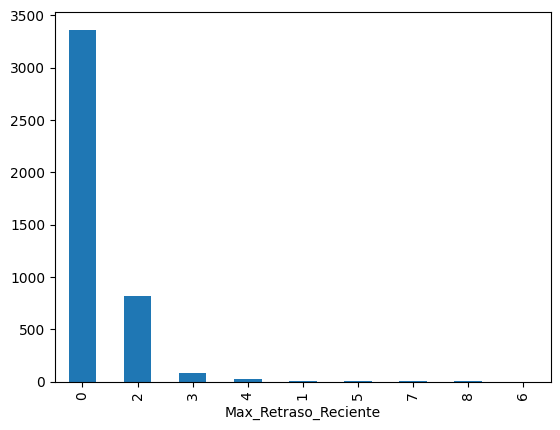

In [263]:
train_PAY_AMT1['Max_Retraso_Reciente'].value_counts().plot(kind='bar')

In [264]:
# train_PAY_AMT1['PAY_6'] = train_PAY_AMT1['PAY_6'] ** 2
# train_PAY_AMT1['PAY_5'] = train_PAY_AMT1['PAY_5'] ** 2
# train_PAY_AMT1['PAY_4'] = train_PAY_AMT1['PAY_4'] ** 2
# train_PAY_AMT1['PAY_3'] = train_PAY_AMT1['PAY_3'] ** 2
# train_PAY_AMT1['PAY_2'] = train_PAY_AMT1['PAY_2'] ** 2

## Clasificación de Variables

In [265]:
# Unidad muestral
var_um = ['CUSTOMER_ID']

# Variables categoricas
var_cat = ['SEX', 'EDUCATION', 'MARRIAGE']

# Variables numericas
var_num = ['LIMIT_BAL','AGE',
           'BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
           'PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6', 
           'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'
           ]# + ['Ratio_Pago_Factura_Anterior', 'Cambio_Pago_Reciente'] 
           #] + lst_var_1 + lst_var_2 + lst_var_3 + lst_var_4

var_tgt = ['PAY_AMT1']

In [266]:
print( len( var_um + var_cat + var_num + var_tgt ) )
print( train_PAY_AMT1.shape )

23
(4314, 37)


In [267]:
#sns.pairplot( train_PAY_AMT1[ var_num ] )

# Modelo (Regresión)

In [268]:
# Conjunto de entrenamiento
X_train = train_PAY_AMT1[ var_cat + var_num ]
y_train = train_PAY_AMT1[ var_tgt ]

X_train = train_PAY_AMT1.drop( columns=var_cat)[var_num].join(pd.get_dummies(train_PAY_AMT1[var_cat], dtype='int', drop_first=True))

# Conjunto de validacion
#X_valid = val_PAY_AMT1[ var_cat + var_num ]

In [269]:
X_train.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,SEX,EDUCATION,MARRIAGE
0,"90,000.00",42,"34,672.00","35,270.00","36,150.00","36,528.00","37,128.00","37,348.00","1,832.00","1,600.00","1,000.00","1,000.00",0.00,0,0,0,0,0,2,2,1
1,"40,000.00",33,"23,734.00","24,644.00","25,749.00","26,127.00","26,401.00","25,839.00","1,800.00","1,100.00","1,000.00",0.00,"2,300.00",2,2,2,2,2,2,3,1
2,"40,000.00",26,"6,223.00","7,944.00","8,961.00","3,090.00",390.00,795.00,"1,196.00","1,000.00","1,950.00",795.00,"1,170.00",0,0,0,-1,-1,2,1,2
3,"90,000.00",50,"83,939.00","86,583.00","87,014.00","46,293.00","47,576.00","46,663.00","2,500.00","2,000.00","2,000.00","2,000.00","2,000.00",0,0,0,0,0,2,2,2
4,"30,000.00",22,"30,123.00","30,299.00","27,758.00","22,720.00","19,136.00","14,452.00","2,000.00","2,000.00",614.00,924.00,0.00,0,0,0,0,0,2,3,2


#### Mejores variables

In [270]:
X_train.shape

(4314, 21)

In [271]:
kb = SelectKBest( k=30, score_func=f_regression )
kb.fit(X_train, y_train)
kb.get_feature_names_out()
ls_best = [x for x, y in zip(X_train.columns, kb.get_support()) if y]
print(ls_best)
X_train = pd.DataFrame(kb.transform(X_train), columns=ls_best)
X_train_cols = X_train.columns

['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'SEX', 'EDUCATION', 'MARRIAGE']


/Users/gblasd/Documents/DataScience/.venv/lib/python3.13/site-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=30 is greater than n_features=21. All the features will be returned.
  warnings.warn(
/Users/gblasd/Documents/DataScience/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [272]:
X_train.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,SEX,EDUCATION,MARRIAGE
0,"90,000.00",42.00,"34,672.00","35,270.00","36,150.00","36,528.00","37,128.00","37,348.00","1,832.00","1,600.00","1,000.00","1,000.00",0.00,0.00,0.00,0.00,0.00,0.00,2.00,2.00,1.00
1,"40,000.00",33.00,"23,734.00","24,644.00","25,749.00","26,127.00","26,401.00","25,839.00","1,800.00","1,100.00","1,000.00",0.00,"2,300.00",2.00,2.00,2.00,2.00,2.00,2.00,3.00,1.00
2,"40,000.00",26.00,"6,223.00","7,944.00","8,961.00","3,090.00",390.00,795.00,"1,196.00","1,000.00","1,950.00",795.00,"1,170.00",0.00,0.00,0.00,-1.00,-1.00,2.00,1.00,2.00
3,"90,000.00",50.00,"83,939.00","86,583.00","87,014.00","46,293.00","47,576.00","46,663.00","2,500.00","2,000.00","2,000.00","2,000.00","2,000.00",0.00,0.00,0.00,0.00,0.00,2.00,2.00,2.00
4,"30,000.00",22.00,"30,123.00","30,299.00","27,758.00","22,720.00","19,136.00","14,452.00","2,000.00","2,000.00",614.00,924.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,3.00,2.00


In [273]:
y_train.head()

,PAY_AMT1
0,"1,562.00"
1,"1,600.00"
2,"2,000.00"
3,"4,000.00"
4,"1,600.00"


SCORE:  0.6993754286660805
[0.65958085 0.37142544 0.58553527 0.77546689]
MEAN 0.5980021118143761
STD 0.1472906125138804
R-squared: 0.6994
Mean squared error: 70085311.5473
Root mean squared error: 8371.6971
Mean Absolute Error: 4285.6489


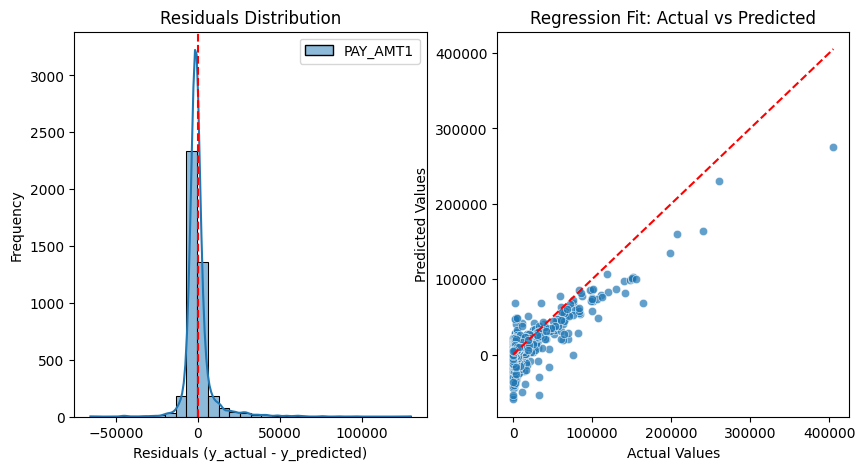

LIMIT_BAL = 0.0072981617
AGE = 17.6402058266
BILL_AMT1 = -0.5967614232
BILL_AMT2 = 0.8691517311
BILL_AMT3 = -0.2095797494
BILL_AMT4 = 0.0311783053
BILL_AMT5 = 0.0108006151
BILL_AMT6 = -0.0380772223
PAY_AMT2 = 0.211450366
PAY_AMT3 = 0.0353175364
PAY_AMT4 = 0.0980538202
PAY_AMT5 = 0.0788612509
PAY_AMT6 = 0.0125113425
PAY_2 = -1080.0871489691
PAY_3 = 105.9937661775
PAY_4 = -193.514544496
PAY_5 = -114.3683712289
PAY_6 = -34.2467261615
SEX = 250.0492450672
EDUCATION = -80.0074370584
MARRIAGE = 70.3311254791
Intercept: [-957.31306242]

Feature Coefficients:
       Feature  Coefficient
0   LIMIT_BAL         0.01
1         AGE        17.64
2   BILL_AMT1        -0.60
3   BILL_AMT2         0.87
4   BILL_AMT3        -0.21
5   BILL_AMT4         0.03
6   BILL_AMT5         0.01
7   BILL_AMT6        -0.04
8    PAY_AMT2         0.21
9    PAY_AMT3         0.04
10   PAY_AMT4         0.10
11   PAY_AMT5         0.08
12   PAY_AMT6         0.01
13      PAY_2    -1,080.09
14      PAY_3       105.99
15      P

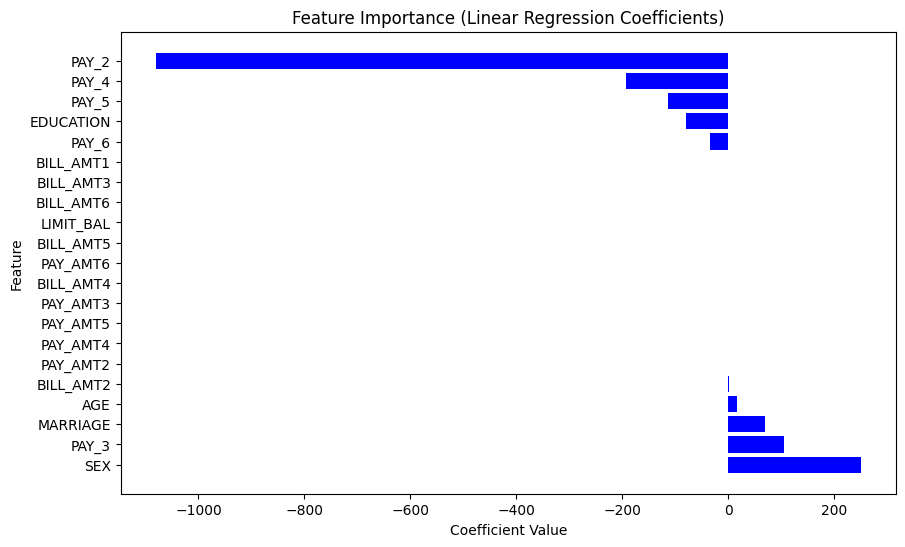

In [ ]:
#from sklearn.preprocessing import MinMaxScaler, StandardScaler
#scaler = MinMaxScaler()
#X_train = scaler.fit_transform(X_train)
#y_train = scaler.fit_transform(y_train)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

print("SCORE: ", linreg.score(X_train, y_train))
ls_scores = cross_val_score(cv = 4, estimator=linreg, X=X_train, y=y_train)
print(ls_scores)
print("MEAN", np.mean(ls_scores))
print("STD", np.std(ls_scores))

# Make predictions.
#y_pred = linreg.predict(train_PAY_AMT1[X_train.columns])
y_pred = linreg.predict(X_train) # los datos ya se encuentran escalados
y_train = pd.DataFrame(y_train)
# Calculate and print errors.
r2 = r2_score(y_train, y_pred)
print(f"R-squared: {r2:.4f}")
mse = mean_squared_error(y_train, y_pred)
print(f"Mean squared error: {mse:.4f}")
rmse = mse ** 0.5
print(f"Root mean squared error: {rmse:.4f}")
mae = mean_absolute_error(y_pred=y_pred, y_true=y_train)
print(f"Mean Absolute Error: {mae:.4f}")



plt.figure(figsize=(10,5))
# Plot 1: Residuals Distribution.
plt.subplot(1,2,1)
residuals = y_train - linreg.predict(X_train)
sns.histplot(residuals, bins=30, kde=True, color="blue")
plt.axvline(x=0, color='red', linestyle='--')
plt.title("Residuals Distribution")
plt.xlabel("Residuals (y_actual - y_predicted)")
plt.ylabel("Frequency")

x_ = np.array(y_train)[:,0]
y_ = y_pred[:,0]
# Plot 2: Regression Fit (Actual vs Predicted).
plt.subplot(1,2,2)
sns.scatterplot(x=x_, y=y_, alpha=0.7)
plt.plot([min(x_), max(x_)], [min(x_), max(x_)], color='red', linestyle='--')  # Perfect fit line
plt.title("Regression Fit: Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

#print("Model coefficients:\n")
for i in range(X_train.shape[1]):
    print(X_train_cols[i], "=", linreg.coef_[0][i].round(10))

# Extraer información del modelo
print("Intercept:", linreg.intercept_)
coeff_df = pd.DataFrame({"Feature": X_train_cols, "Coefficient": linreg.coef_[0]})
print("\nFeature Coefficients:\n", coeff_df)

# Resumir los resultados del modelo 
# Sort dataframe by coefficients.
coef_df_sorted = coeff_df.sort_values(by="Coefficient", ascending=False)

# Create plot.
plt.figure(figsize=(10,6))
#plt.barh(coeff_df["Feature"], coef_df_sorted["Coefficient"], color="blue")
plt.barh(data=coef_df_sorted, y="Feature", width="Coefficient", color="blue")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.show()